## Importing libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd

In [2]:
root_dir = '../../../nsynth-guitar-subset/train/'
dataset_file = '../../../nsynth-guitar-subset/train/examples.json'
audio_dir = '../../../nsynth-guitar-subset/train/audio/'

Qualities indicate the type of sound. This is used to describe the timbre of the sound. 

In [3]:
index_to_qualities = {
    0: 'bright',
    1: 'dark',
    2: 'distortion',
    3: 'fast_decay',
    4: 'long_release',
    5: 'multiphonic',
    6: 'nonlinear_env',
    7: 'percussive',
    8: 'reverb',
    9: 'tempo_sync'
}

qualities_to_index = dict((v, k) for k, v in index_to_qualities.items())

index_to_source = {
    0: 'acoustic',
    1: 'electronic',
    2: 'synthetic'
}

source_to_index = dict((v, k) for k, v in index_to_source.items())

In [4]:
with open(dataset_file, 'r') as f:
    data = json.load(f)

In [5]:
# all labels
_, v = next(iter(data.items()))

list(v.keys())

['note',
 'sample_rate',
 'pitch',
 'instrument_source',
 'instrument_family_str',
 'instrument_str',
 'note_str',
 'qualities_str',
 'instrument_source_str',
 'velocity',
 'instrument_family',
 'instrument',
 'qualities']

In [6]:
ignore_cols = [
    'note', # unique identifier, not relevant
    'sample_rate', # sample rate is 16000 for all notes
    'instrument_source', # numeric value of instrument_source_str, duplicate
    'instrument_family', # numeric value of instrument_family_str, duplicate
    'instrument_family_str', # we can ignore, since we are looking only at 3
    'qualities', # numeric values of qualities_str, duplicate
    'qualities_str', # list of qualities will be added as independent columns
    'note_str', # unique identifier, not relevant
    'instrument', # unique identifier, not relevant
    'instrument_str', # unique identifier, not relevant
    'instrument_source_str' # will add as qualities
]

In [7]:
columns = [x for x in list(v.keys()) if x not in ignore_cols]
columns = columns + list(qualities_to_index.keys()) + list(source_to_index.keys())
print(columns)

['pitch', 'velocity', 'bright', 'dark', 'distortion', 'fast_decay', 'long_release', 'multiphonic', 'nonlinear_env', 'percussive', 'reverb', 'tempo_sync', 'acoustic', 'electronic', 'synthetic']


In [8]:
dataset = dict((c, []) for c in columns)

for key, value in data.items():
    dataset['pitch'].append(value.get('pitch') or 0)
    dataset['velocity'].append(value.get('velocity') or 0)
    
    for q in qualities_to_index.keys():
        if q in value.get('qualities_str'):
            dataset[q].append(1)
        else:
            dataset[q].append(0)
    
    for s in source_to_index.keys():
        if s == value.get('instrument_source_str'):
            dataset[s].append(1)
        else:
            dataset[s].append(0)

In [9]:
df = pd.DataFrame(dataset)

In [10]:
df.head()

,pitch,velocity,bright,dark,distortion,fast_decay,long_release,multiphonic,nonlinear_env,percussive,reverb,tempo_sync,acoustic,electronic,synthetic
0,82,50,0,0,0,0,0,0,0,1,0,0,1,0,0
1,26,25,0,0,0,1,0,0,0,1,0,0,0,1,0
2,62,127,0,0,1,0,0,0,0,0,0,0,0,1,0
3,61,50,0,0,1,0,0,0,0,0,0,0,0,1,0
4,71,127,0,0,0,0,0,0,0,0,0,0,0,0,1


In [11]:
df.describe()

,pitch,velocity,bright,dark,distortion,fast_decay,long_release,multiphonic,nonlinear_env,percussive,reverb,tempo_sync,acoustic,electronic,synthetic
count,32690.000000,32690.000000,32690.000000,32690.000000,32690.000000,32690.000000,32690.000000,32690.000000,32690.000000,32690.000000,32690.000000,32690.0,32690.000000,32690.000000,32690.000000
mean,63.477638,75.552860,0.278678,0.104772,0.236923,0.297430,0.092628,0.031508,0.021107,0.214683,0.145182,0.0,0.348119,0.490517,0.161364
std,23.977166,35.964137,0.448356,0.306264,0.425201,0.457135,0.289914,0.174689,0.143745,0.410609,0.352290,0.0,0.476381,0.499918,0.367872
min,9.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,44.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,63.000000,75.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,83.000000,100.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000
max,120.000000,127.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


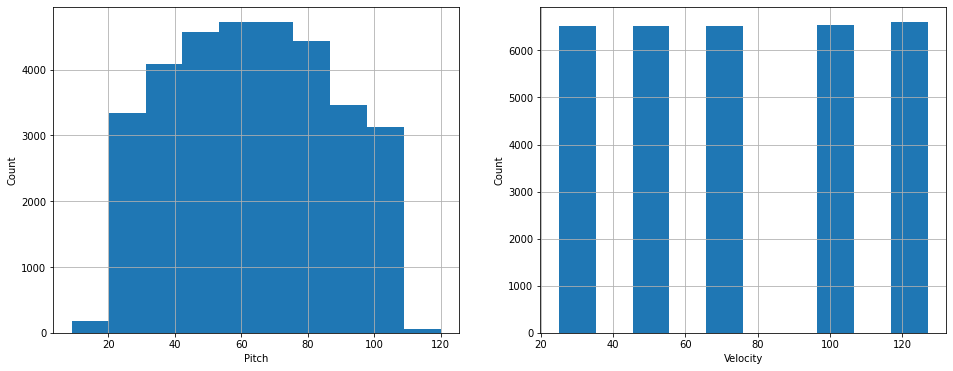

In [12]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
df.loc[:, 'pitch'].hist()
plt.ylabel('Count')
plt.xlabel('Pitch')
plt.subplot(1, 2, 2)
df.loc[:, 'velocity'].hist()
plt.ylabel('Count')
plt.xlabel('Velocity')
plt.show()

In [13]:
qualities = df.iloc[:, 2:]

In [14]:
qualities.sum()

bright            9110
dark              3425
distortion        7745
fast_decay        9723
long_release      3028
multiphonic       1030
nonlinear_env      690
percussive        7018
reverb            4746
tempo_sync           0
acoustic         11380
electronic       16035
synthetic         5275
dtype: int64

In [15]:
qualities = qualities.drop(columns=['tempo_sync'])
qualities.corr()

,bright,dark,distortion,fast_decay,long_release,multiphonic,nonlinear_env,percussive,reverb,acoustic,electronic,synthetic
bright,1.000000,-0.212639,0.370456,-0.032327,0.026632,0.115596,-0.040483,-0.070582,0.004530,-0.002916,-0.002676,0.007413
dark,-0.212639,1.000000,-0.139882,0.022135,0.057796,-0.061705,-0.050235,-0.088131,-0.077191,-0.014113,-0.200807,0.291160
distortion,0.370456,-0.139882,1.000000,-0.094682,-0.023179,-0.100504,-0.031771,-0.175869,-0.229635,-0.211764,0.286239,-0.114755
fast_decay,-0.032327,0.022135,-0.094682,1.000000,-0.207886,-0.087094,-0.067144,0.491316,0.025909,0.084038,-0.104853,0.033663
long_release,0.026632,0.057796,-0.023179,-0.207886,1.000000,0.220832,0.198263,-0.167053,0.010600,-0.116753,0.128060,-0.022835
multiphonic,0.115596,-0.061705,-0.100504,-0.087094,0.220832,1.000000,0.509550,-0.073408,0.218948,0.085077,-0.022851,-0.079119
nonlinear_env,-0.040483,-0.050235,-0.031771,-0.067144,0.198263,0.509550,1.000000,-0.056044,-0.060516,-0.107307,0.149654,-0.064412
percussive,-0.070582,-0.088131,-0.175869,0.491316,-0.167053,-0.073408,-0.056044,1.000000,0.107667,0.139487,-0.101556,-0.042622
reverb,0.004530,-0.077191,-0.229635,0.025909,0.010600,0.218948,-0.060516,0.107667,1.000000,0.244409,-0.099876,-0.180774
acoustic,-0.002916,-0.014113,-0.211764,0.084038,-0.116753,0.085077,-0.107307,0.139487,0.244409,1.000000,-0.717037,-0.320551


In [16]:
q_cols = list(qualities.columns)
q_cols

['bright',
 'dark',
 'distortion',
 'fast_decay',
 'long_release',
 'multiphonic',
 'nonlinear_env',
 'percussive',
 'reverb',
 'acoustic',
 'electronic',
 'synthetic']

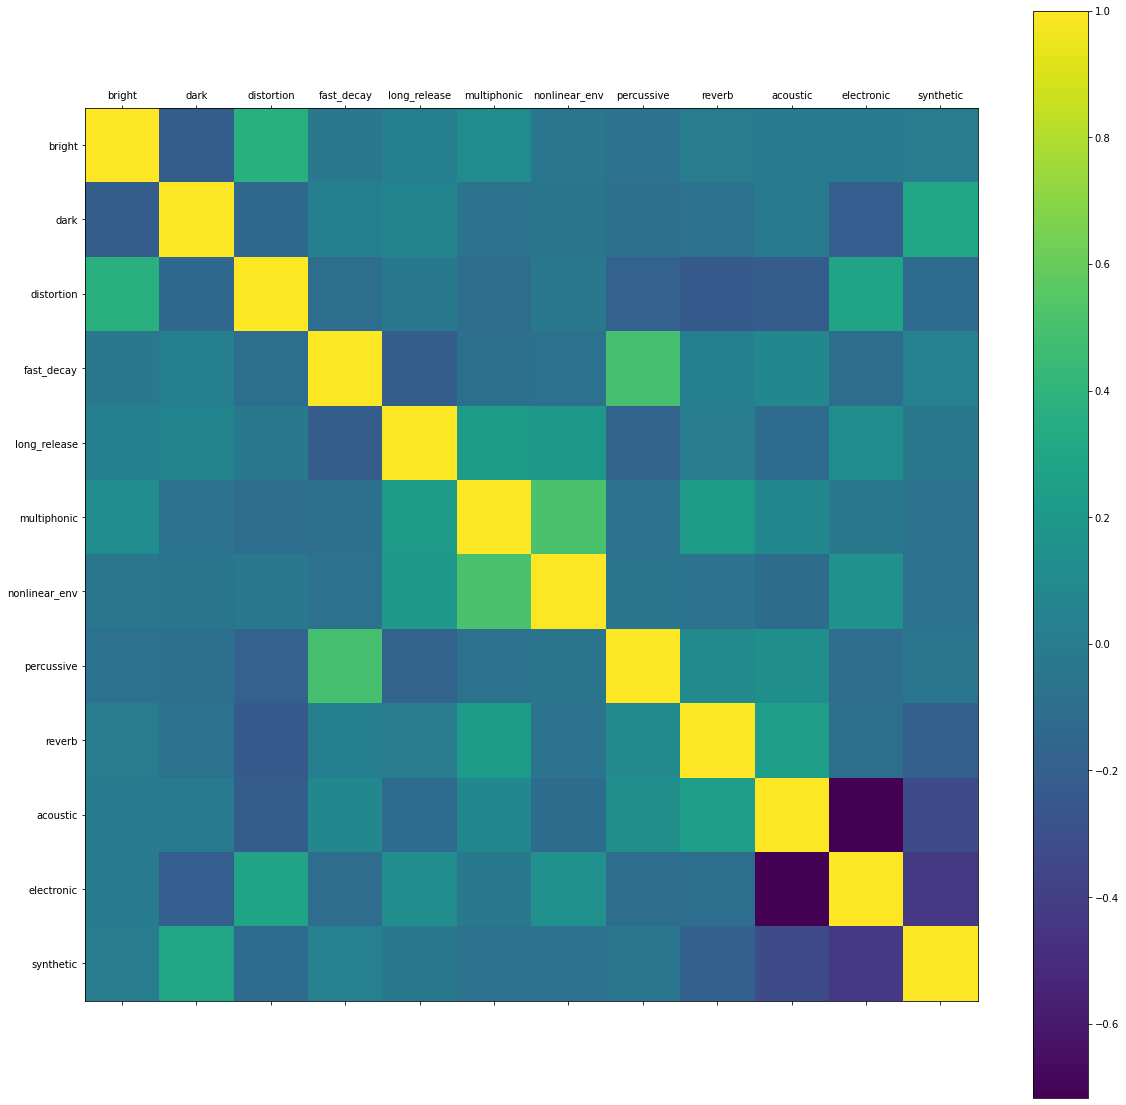

In [17]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1)
cax = ax.matshow(qualities.corr())
fig.colorbar(cax)
ax.set_xticks(list(range(0, len(q_cols))))
ax.set_yticks(list(range(0, len(q_cols))))
ax.set_xticklabels(q_cols)
ax.set_yticklabels(q_cols)
plt.show()